In [33]:
import torch

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"GPU name: {torch.cuda.get_device_name(0)}")

Using device: cuda
GPU name: NVIDIA GeForce RTX 4060 Laptop GPU


In [34]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [35]:
import h5py
import pandas as pd

# ---- Step 1: check what keys are inside the HDF5 file ----
file_path = r"X:\Study\Projects\ML-Basics-Project\data\madrid.h5"

with h5py.File(file_path, "r") as f:
    print("Available keys inside file:", list(f.keys()))

# ---- Step 2: try loading one key with pandas ----
# Replace 'your_key_here' with one of the keys printed above
try:
    df = pd.read_hdf(file_path, key="28079018")
    print(df.head())
except Exception as e:
    print("Error while loading with pandas:", e)

Available keys inside file: ['28079001', '28079003', '28079004', '28079006', '28079007', '28079008', '28079009', '28079011', '28079012', '28079014', '28079015', '28079016', '28079017', '28079018', '28079019', '28079021', '28079022', '28079023', '28079024', '28079025', '28079026', '28079027', '28079035', '28079036', '28079038', '28079039', '28079040', '28079047', '28079048', '28079049', '28079050', '28079054', '28079055', '28079056', '28079057', '28079058', '28079059', '28079060', '28079099', 'master']
                     BEN    CO  EBE  NMHC  NO       NO_2    NOx        O_3  \
date                                                                         
2001-08-01 01:00:00  NaN  0.17  NaN  0.06 NaN  28.980000  31.48  48.290001   
2001-08-01 02:00:00  NaN  0.14  NaN  0.06 NaN  26.959999  28.83  49.310001   
2001-08-01 03:00:00  NaN  0.15  NaN  0.04 NaN  25.350000  26.84  50.759998   
2001-08-01 04:00:00  NaN  0.16  NaN  0.04 NaN  24.440001  26.01  52.459999   
2001-08-01 05:00:00  NaN 

In [36]:
print(df.shape)
df.sample(5)

(149760, 12)


,BEN,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,SO_2,TCH,TOL
date,,,,,,,,,,,,
2003-07-21 08:00:00,NaN,0.88,NaN,0.24,NaN,60.160000,103.800003,6.910000,48.490002,13.79,1.65,NaN
2009-10-06 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-17 08:00:00,NaN,0.72,NaN,NaN,NaN,67.129997,127.199997,5.710000,43.869999,8.34,NaN,NaN
2002-06-16 21:00:00,NaN,0.28,NaN,0.07,NaN,32.720001,35.279999,73.650002,83.120003,4.61,1.33,NaN
2016-02-05 08:00:00,0.6,0.50,0.3,NaN,56.0,55.000000,NaN,2.000000,12.000000,5.00,NaN,2.0


In [37]:
df.isnull().sum()

BEN      79214
CO         707
EBE      79243
NMHC    118297
NO       86426
NO_2       789
NOx      59103
O_3        693
PM10      5681
SO_2       740
TCH     118319
TOL      79433
dtype: int64

In [38]:
df.columns

Index(['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2',
       'TCH', 'TOL'],
      dtype='object')

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

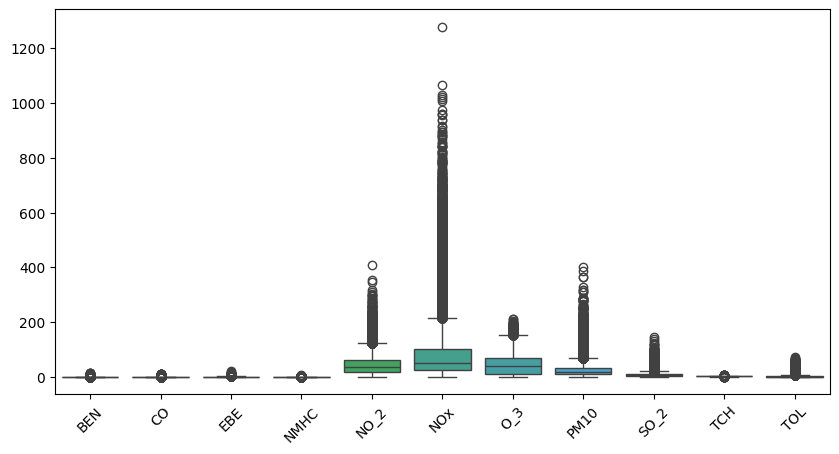

In [40]:
pollutant_cols = ['BEN', 'CO', 'EBE', 'NMHC', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TCH','TOL']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [41]:
print((df == 0).sum())

BEN        1
CO      1083
EBE        3
NMHC     529
NO         0
NO_2       1
NOx        1
O_3        1
PM10       4
SO_2       1
TCH        0
TOL        0
dtype: int64


In [42]:
df = df[~(df[pollutant_cols] == 0).any(axis=1)]
(df == 0).sum()

BEN     0
CO      0
EBE     0
NMHC    0
NO      0
NO_2    0
NOx     0
O_3     0
PM10    0
SO_2    0
TCH     0
TOL     0
dtype: int64

In [43]:
def cap(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    
    lower = q1 - 2*iqr
    upper = q3 + 2*iqr
    
    df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

for col in pollutant_cols:
    df = cap(df,col)

<function matplotlib.pyplot.show(close=None, block=None)>

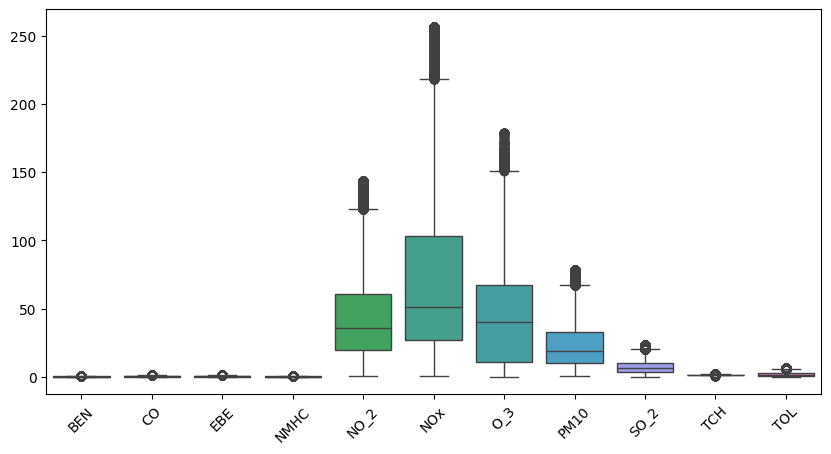

In [44]:
# for col in pollutant_cols:
#     df[col]=np.log1p(df[col])
    
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [45]:
df.shape

(148238, 12)

In [46]:
df.isnull().sum()

BEN      77698
CO         707
EBE      77727
NMHC    118257
NO       84910
NO_2       788
NOx      59096
O_3        693
PM10      5322
SO_2       739
TCH     118247
TOL      77917
dtype: int64

In [47]:
df = df.dropna(axis=1, thresh=len(df)*0.4)  # keep only cols with >=40% non-missing
print(df.isnull().sum())
print(df.shape)
df.columns

BEN     77698
CO        707
EBE     77727
NO      84910
NO_2      788
NOx     59096
O_3       693
PM10     5322
SO_2      739
TOL     77917
dtype: int64
(148238, 10)


Index(['BEN', 'CO', 'EBE', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TOL'], dtype='object')

In [48]:
from scipy.stats import skew
pollutant_cols=['BEN', 'CO', 'EBE', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TOL']
skewness_value = skew(df[pollutant_cols].dropna())
print(skewness_value)
print(pollutant_cols)

[0.40140564 1.51728449 1.85017838 2.75701772 0.91766706 1.11796413
 0.31985276 1.44048949 1.21596219 0.97182879]
['BEN', 'CO', 'EBE', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TOL']


In [49]:
df_temp = df 

skewness = [0.40140564, 1.51728449, 1.85017838 ,2.75701772, 0.91766706, 1.11796413, 0.31985276, 1.44048949, 1.21596219, 0.97182879]

for col, sk in zip(pollutant_cols, skewness):
    if abs(sk) > 0.9:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()

C:\Users\upman\AppData\Local\Temp\ipykernel_17644\1989977171.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\upman\AppData\Local\Temp\ipykernel_17644\1989977171.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

BEN     0
CO      0
EBE     0
NO      0
NO_2    0
NOx     0
O_3     0
PM10    0
SO_2    0
TOL     0
dtype: int64

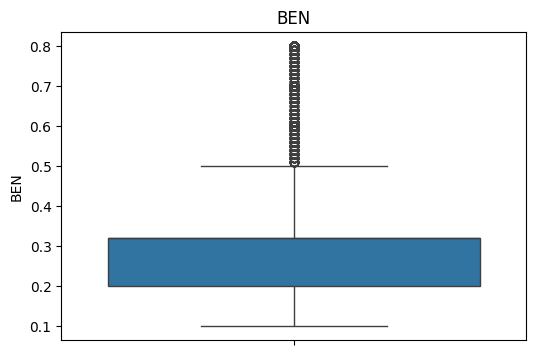

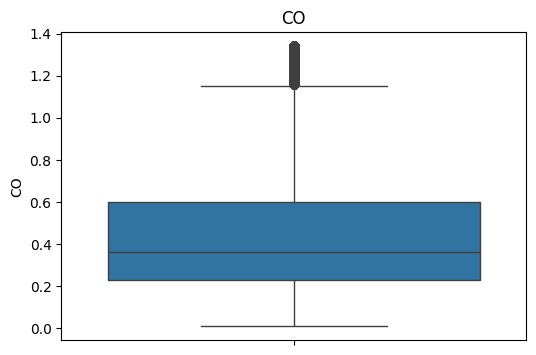

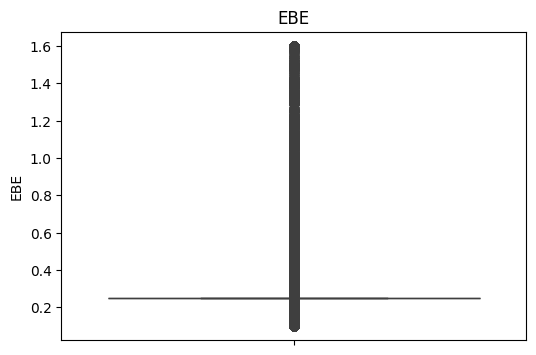

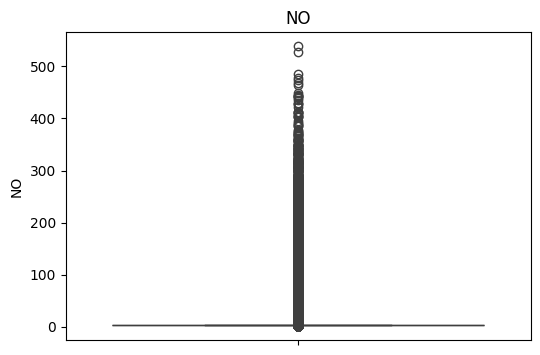

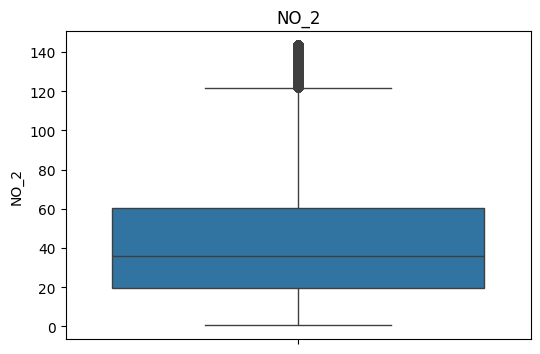

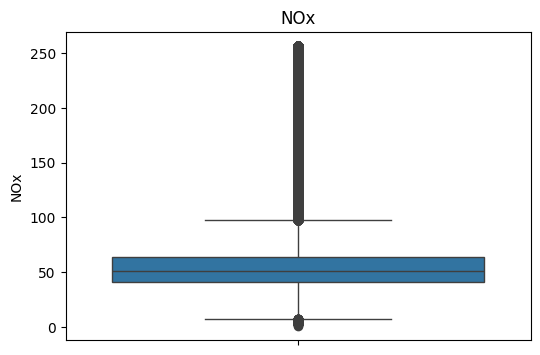

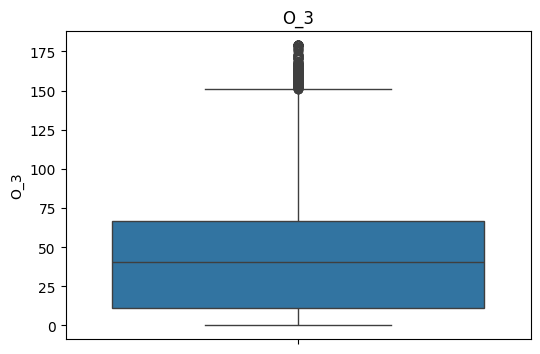

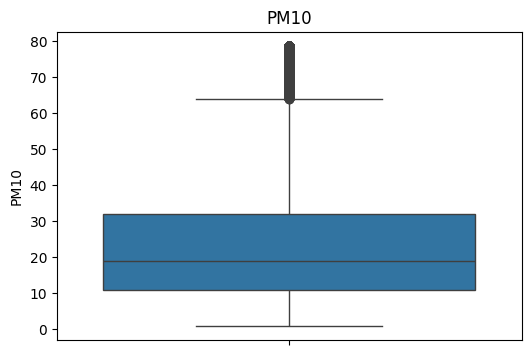

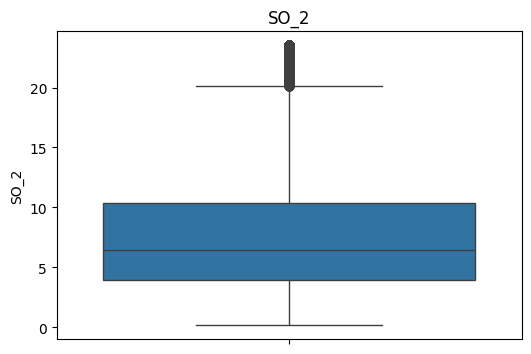

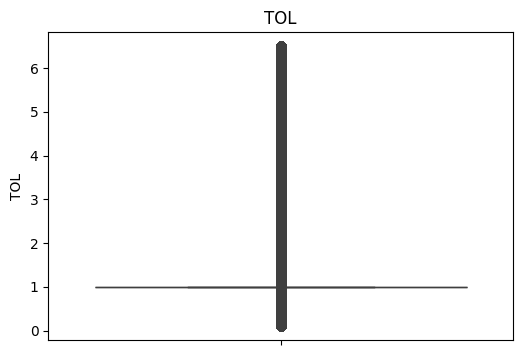

In [50]:
import seaborn as sns

for col in pollutant_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

In [51]:
df=df.drop(columns=['TOL','NO','EBE'])

In [52]:
df.columns
pollutant_cols=['BEN', 'CO','NO_2', 'NOx', 'O_3', 'PM10', 'SO_2']

In [53]:
Q1 = df['NOx'].quantile(0.25)
Q3 = df['NOx'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR
df['NOx'] = np.where(df['NOx'] > upper_bound, upper_bound,
              np.where(df['NOx'] < lower_bound, lower_bound, df['NOx']))
df.head(6)

,BEN,CO,NO_2,NOx,O_3,PM10,SO_2
date,,,,,,,
2001-08-01 01:00:00,0.321282,0.17,28.980000,31.480000,48.290001,78.680000,7.73
2001-08-01 02:00:00,0.321282,0.14,26.959999,28.830000,49.310001,78.680000,7.64
2001-08-01 03:00:00,0.321282,0.15,25.350000,26.840000,50.759998,62.320000,7.74
2001-08-01 04:00:00,0.321282,0.16,24.440001,26.010000,52.459999,55.009998,7.71
2001-08-01 05:00:00,0.321282,0.19,26.030001,27.600000,55.540001,58.830002,7.83
2001-08-01 06:00:00,0.321282,0.19,22.879999,24.190001,60.849998,44.700001,7.57


<function matplotlib.pyplot.show(close=None, block=None)>

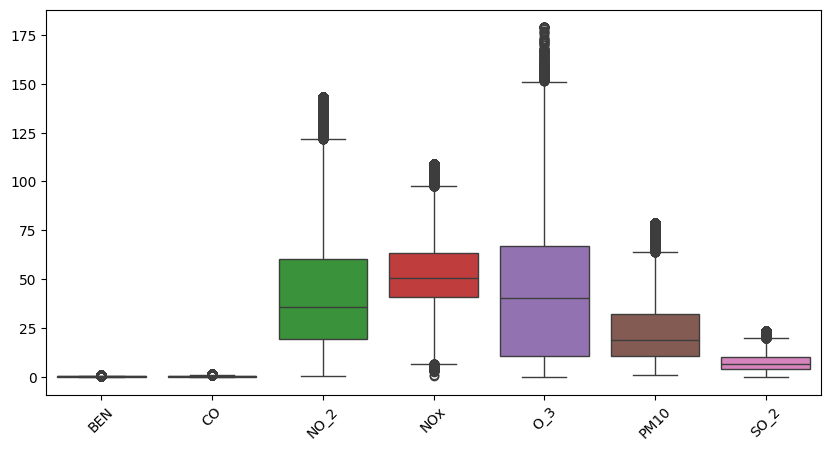

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [55]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

994
0


In [ ]:
#Feature Enginnering for regression
df_reg = df.copy()
# Vehicles → NOx, CO, some SO₂, + PM10 directly.
# Industries → SO₂, NOx, + PM10 directly.
# PM10 → dono ka combined impact + extra dust sources.
df_reg["CO_m_NOx"]  = df_reg["CO"]  - df_reg["NOx"]
df_reg["NO2_m_NOx"] = df_reg["NO_2"]- df_reg["NOx"]
df_reg["O3_m_NOx"]  = df_reg["O_3"] - df_reg["NOx"]
df_reg["SO2_m_NOx"] = df_reg["SO_2"]- df_reg["NOx"]
df_reg["BEN_m_NOx"] = df_reg["BEN"]- df_reg["NOx"]
#NOx dono mein common he 
#NOx ek traffic-related pollutant hai, aur PM10 bhi mostly traffic + dust sources se linked hota hai. 
#Agar tum bas raw pollutants lete ho (CO, NO₂, O₃, SO₂, NOx), toh model ko relation dhoondhna thoda “spread out” hoga.

In [ ]:
#pollutants ke combination bana rahe ho jo research literature mein air-quality ke liye kaafi common hai.
df_reg["OX"] = np.log1p(np.expm1(df_reg["O_3"]) + np.expm1(df_reg["NO_2"]))   #OX index = O₃ + NO₂
#np.expm1() (reverse log) #Fir np.log1p() use karke dobara log-scale pe
df_reg["COMB"] = np.log1p(np.expm1(df_reg["CO"]) + np.expm1(df_reg["NOx"]) + np.expm1(df_reg["SO_2"]))
#CO, NOx, SO₂  # industrial+vehicle
df_reg.head(6)

In [ ]:
df_reg.index = pd.to_datetime(df_reg.index)
df_reg['date_code'] = df_reg.index.year - df_reg.index.year.min() + 1
df_reg = df_reg.reset_index()
df_reg.sample(6)

In [ ]:
pollutant_cols

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
df_reg = df_reg.drop(columns=['date','BEN', 'CO', 'NO_2', 'NOx', 'O_3', 'SO_2'])
groups = df_reg["date_code"]
splitter = GroupShuffleSplit(n_splits=1, test_size=0.33, random_state=1)
train_idx, test_idx = next(splitter.split(df_reg, groups=groups))
df_train = df_reg.iloc[train_idx]
df_test  = df_reg.iloc[test_idx]

In [ ]:
df_train.columns

In [ ]:
from sklearn.linear_model import LinearRegression
X_train = df_train.drop(columns=["PM10"])
y_train = df_train["PM10"]
X_test = df_test.drop(columns=["PM10"])
y_test = df_test["PM10"]

from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
mse = cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("MSE: ",mse)
print("MSE Mean: ",mse.mean())

In [ ]:
y_pred = lin_reg.predict(X_test)
from sklearn.metrics import r2_score

r2_score1=r2_score(y_test, y_pred)

print(r2_score1)

In [ ]:
ridge = Ridge()
params = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,75,80,100,125,130,150,200,300,400,450,500,550,600]}
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

print("Best Alpha:", ridge_regressor.best_params_)
print("Best Score:", ridge_regressor.best_score_)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=10000)

params = {"alpha": [1e-29,1e-22,1e-21,1e-20,1e-18,1e-17,1e-16,1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2,
                    1, 5, 10, 20, 50, 100, 200, 500]}

lasso_cv = GridSearchCV(lasso, params, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_train, y_train)

print("Best Alpha:", lasso_cv.best_params_["alpha"])
print("Best CV Score:", lasso_cv.best_score_)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Features and target
X_train = df_train.drop(columns=["PM10"])
y_train = df_train["PM10"]
X_test = df_test.drop(columns=["PM10"])
y_test = df_test["PM10"]

# KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # default 5 neighbors
knn.fit(X_train, y_train)

# Cross-validation (MSE)
mse = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE: ", mse)
print("MSE Mean: ", mse.mean())

# Predictions & R² score
y_pred = knn.predict(X_test)
r2_score1 = r2_score(y_test, y_pred)
print("R2 Score:", r2_score1)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    random_state=1,      
    n_jobs=-1
)
xgb_reg.fit(X_train, y_train)
mse = cross_val_score(xgb_reg, X_train, y_train,
                      scoring='neg_mean_squared_error',
                      cv=5)

print("MSE (each fold): ", mse)
print("MSE Mean: ", mse.mean())

print("MAE: ", mean_absolute_error(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10, 
    random_state=1,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train)
mse = cross_val_score(rf_reg, X_train, y_train,
                      scoring='neg_mean_squared_error',
                      cv=5)

print("MSE (each fold): ", mse)
print("MSE Mean: ", mse.mean())

y_pred = rf_reg.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))


In [ ]:
y_pred = ridge_regressor.predict(X_test)
r2_score1=r2_score(y_test, y_pred)
print(r2_score1)

In [ ]:
y_pred = lasso_cv.predict(X_test)
r2_score1=r2_score(y_test,y_pred)
print(r2_score1)

In [ ]:
y_pred = rf_reg.predict(X_test)
r2_score1=r2_score(y_test, y_pred)
print("Rf: ",r2_score1)

In [ ]:
y_pred = xgb_reg.predict(X_test)
r2_score1=r2_score(y_test, y_pred)
print("Xg: ",r2_score1)

Classification Problem

In [56]:
df_master=df

In [83]:
df=df_master
print(df.shape)
df.sample(5)

(147244, 7)


,BEN,CO,NO_2,NOx,O_3,PM10,SO_2
date,,,,,,,
2001-01-29 17:00:00,0.321282,1.25,36.000000,50.889999,14.56,13.120000,23.54
2011-03-21 03:00:00,0.200000,0.20,20.000000,50.889999,69.00,10.000000,7.00
2010-05-06 03:00:00,0.200000,0.19,17.410000,22.090000,95.25,9.580000,9.11
2012-05-02 12:00:00,0.200000,0.40,18.000000,50.889999,57.00,11.000000,3.00
2007-10-08 10:00:00,0.321282,0.82,67.730003,109.180000,7.75,50.889999,14.71


In [84]:
df.columns

Index(['BEN', 'CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2'], dtype='object')

In [85]:
pollutants = ['BEN','CO','NO_2','NOx','O_3','PM10','SO_2']
from sklearn.preprocessing import MinMaxScaler

# --- scale 0-1
scaler = MinMaxScaler()
df_classi = pd.DataFrame(scaler.fit_transform(df[pollutants]), 
                         columns=pollutants, index=df.index)

In [86]:
# pehle avg_score nikal liya jaise tum kar rahe the
df_classi['avg_score'] = df_classi.mean(axis=1)

# quantile thresholds nikalte h
q1 = df_classi['avg_score'].quantile(0.25)
q2 = df_classi['avg_score'].quantile(0.70)

# function banate h
def avg_quantile(x):
    if x <= q1:
        return "Good"
    elif x <= q2:
        return "Okay"
    else:
        return "Bad"

df_classi['AQI_demo'] = df_classi['avg_score'].apply(avg_quantile)

In [87]:
df_classi['AQI_demo'].value_counts()

AQI_demo
Okay    66260
Bad     44173
Good    36811
Name: count, dtype: int64

In [88]:
df_classi.sample(5)

,BEN,CO,NO_2,NOx,O_3,PM10,SO_2,avg_score,AQI_demo
date,,,,,,,,,
2008-10-29 13:00:00,0.316118,0.135338,0.110994,0.201511,0.309026,0.097201,0.088575,0.179823,Good
2016-02-07 19:00:00,0.142857,0.218045,0.254622,0.462913,0.267420,0.066769,0.121095,0.219103,Good
2003-05-30 03:00:00,0.316118,0.210526,0.207073,0.291993,0.370149,0.685157,0.490372,0.367341,Okay
2007-07-16 16:00:00,0.316118,0.112782,0.069398,0.110569,0.407617,0.517463,0.189987,0.246276,Okay
2015-09-05 21:00:00,0.142857,0.142857,0.219608,0.462913,0.491108,0.259373,0.078306,0.256718,Okay


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

# Your dataset
X = df_classi.drop(columns=["AQI_demo"]) # drop index/column with date-time
y = df_classi["AQI_demo"]                     # Good / Okay / Bad

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1, stratify=y
)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1_macro')

In [ ]:
# Params for GridSearch
params = [
    {'C': [1, 5, 10]},
    {'max_iter': [100, 150]}
]

# Model without fixed C
model1 = LogisticRegression()

# GridSearchCV
model = GridSearchCV(model1, param_grid=params, scoring='f1_macro', cv=5)
model.fit(X_train, y_train)

In [91]:
print(model.best_params_)
print(model.best_score_)
y_pred=model.predict(X_test)

{'C': 5}
0.9981719722960944


In [92]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[14530,     0,    47],
       [    0, 12135,    13],
       [   20,    23, 21823]])

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9978802658928608

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. KNN
params_knn = {'n_neighbors': [3, 5, 7]}
model_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params_knn, scoring='f1_macro', cv=5)
model_knn.fit(X_train, y_train)
print("\n--- KNN ---")
print(model_knn.best_params_)
print(model_knn.best_score_)
y_pred = model_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


--- KNN ---
{'n_neighbors': 7}
0.9707164177675462
Accuracy: 0.9729991150624602
[[14240     0   337]
 [    0 11810   338]
 [  200   437 21229]]
              precision    recall  f1-score   support

         Bad       0.99      0.98      0.98     14577
        Good       0.96      0.97      0.97     12148
        Okay       0.97      0.97      0.97     21866

    accuracy                           0.97     48591
   macro avg       0.97      0.97      0.97     48591
weighted avg       0.97      0.97      0.97     48591



In [ ]:

# 2. Decision Tree (gini)
params_dt = {'max_depth': [5, 10, 15]}
model_dt_gini = GridSearchCV(DecisionTreeClassifier(criterion="gini"), param_grid=params_dt, scoring='f1_macro', cv=5)
model_dt_gini.fit(X_train, y_train)
print("\n--- Decision Tree (gini) ---")
print(model_dt_gini.best_params_)
print(model_dt_gini.best_score_)
y_pred = model_dt_gini.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


--- Decision Tree (gini) ---
{'max_depth': 5}
1.0
Accuracy: 0.9999794200572122
[[14577     0     0]
 [    0 12148     0]
 [    1     0 21865]]
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     14577
        Good       1.00      1.00      1.00     12148
        Okay       1.00      1.00      1.00     21866

    accuracy                           1.00     48591
   macro avg       1.00      1.00      1.00     48591
weighted avg       1.00      1.00      1.00     48591



In [ ]:

# 3. Decision Tree (entropy)
model_dt_entropy = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid=params_dt, scoring='f1_macro', cv=5)
model_dt_entropy.fit(X_train, y_train)
print("\n--- Decision Tree (entropy) ---")
print(model_dt_entropy.best_params_)
print(model_dt_entropy.best_score_)
y_pred = model_dt_entropy.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


--- Decision Tree (entropy) ---
{'max_depth': 5}
1.0
Accuracy: 0.9999794200572122
[[14577     0     0]
 [    0 12148     0]
 [    1     0 21865]]
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     14577
        Good       1.00      1.00      1.00     12148
        Okay       1.00      1.00      1.00     21866

    accuracy                           1.00     48591
   macro avg       1.00      1.00      1.00     48591
weighted avg       1.00      1.00      1.00     48591



In [ ]:

# 4. Random Forest
params_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
model_rf = GridSearchCV(RandomForestClassifier(), param_grid=params_rf, scoring='f1_macro', cv=5)
model_rf.fit(X_train, y_train)
print("\n--- Random Forest ---")
print(model_rf.best_params_)
print(model_rf.best_score_)
y_pred = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


--- Random Forest ---
{'max_depth': 10, 'n_estimators': 50}
0.9999789744799926
Accuracy: 0.9999588401144245
[[14577     0     0]
 [    0 12147     1]
 [    1     0 21865]]
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     14577
        Good       1.00      1.00      1.00     12148
        Okay       1.00      1.00      1.00     21866

    accuracy                           1.00     48591
   macro avg       1.00      1.00      1.00     48591
weighted avg       1.00      1.00      1.00     48591

